# Setup and data cleaning

In [277]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [315]:
# Import IMDB movie data
title_basics = pd.read_csv('../data/title.basics.tsv',delimiter='\t',encoding='utf-8-sig', low_memory=False)

# Import ratings
title_ratings = pd.read_csv('../data/title.ratings.tsv',delimiter='\t',encoding='utf-8-sig')

# Import crew
title_crew = pd.read_csv('../data/title.crew.tsv',delimiter='\t',encoding='utf-8-sig')

# Import name basics
name_basics = pd.read_csv('../data/name.basics.tsv',delimiter='\t',encoding='utf-8-sig')

# Import box office data from BoxOfficeMojo
box_office = pd.read_csv('../data/boxoffice.csv')

# Import Oscar data from Wikipedia: https://en.wikipedia.org/wiki/List_of_Academy_Award-winning_films
oscars = pd.read_csv('../data/oscars_cleaned.csv')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: malformed \N character escape (<ipython-input-315-e02f468a9b43>, line 2)

In [120]:
# Filter non-movies, adult movies
title_filtered = title_basics[title_basics['titleType']=='movie']
title_filtered = title_filtered[title_filtered['isAdult']==0]

In [129]:
# Split out genres and join
genres_split = title_filtered["genres"].str.split(",", n=2, expand=True)
joined = title_filtered.join(genres_split)

In [131]:
# Rename and drop some columns
cleaned = joined.rename(columns = {'tconst':'IMDB ID', 'titleType': 'Type', 'primaryTitle': 'Title', 'originalTitle': 'Title (original)', 'startYear': 'Year', 'runtimeMinutes': 'Runtime (min)', 0:'Genre (main)', 1:'Genre (sub 1)', 2:'Genre (sub 2)'})
cleaned = cleaned.drop(columns=['endYear', 'genres', 'Genre (sub 1)', 'Genre (sub 2)', 'Title (original)'])

In [ ]:
#cleaned = cleaned.dropna(axis='rows')

In [451]:
# Merge basic set and rating
with_ratings = cleaned.set_index('IMDB ID').join(title_ratings.set_index('tconst'))
with_ratings = with_ratings.rename(columns = {'averageRating': 'Rating (avg.)', 'numVotes': 'Votes'})

# Merge box office and Oscars
merged = pd.merge(box_office, oscars, left_on='title', right_on='Film', how='outer')

In [452]:
# Merge both of above to make combined set
combined = with_ratings.merge(merged,how='left', left_on='Title', right_on='title')

In [453]:
# Drop, rename, change \N to NaN
combined = combined.drop(['Type', 'isAdult', 'Year_y', 'year', 'rank', 'title', 'Film'], axis=1)
combined = combined.rename(columns = {'Year_x': 'Year', 'studio': 'Studio', 'lifetime_gross': 'Gross (lifetime)'})
combined = combined.replace(r'\\N','NaN', regex=True)

In [454]:
## FIX RUNTIME NaN #dropped = combined[combined['Runtime (min)']!='NaN']
## DROP TO MAKE PROTOTYPING EASIER
dropped = combined.dropna(axis='rows')
dropped.head()

,Title,Year,Runtime (min),Genre (main),Rating (avg.),Votes,Studio,Gross (lifetime),Awards,Nominations
415,Anna Karenina,1914,NaN,Drama,5.6,14.0,Focus,12816367.0,1.0,4.0
902,Anna Karenina,1915,NaN,Drama,4.3,7.0,Focus,12816367.0,1.0,4.0
2124,The Patriot,1916,50,Western,7.4,8.0,Sony,113330342.0,1.0,5.0
2701,Great Expectations,1917,50,Drama,5.8,16.0,Fox,26420672.0,2.0,5.0
3306,Anna Karenina,1918,53,Drama,5.3,18.0,Focus,12816367.0,1.0,4.0


# Machine Learning

In [455]:
# Reset index
dropped = dropped.reset_index()
dropped = dropped.drop(['index'], axis=1)

In [468]:
dropped.head(1000)

,Title,Year,Runtime (min),Genre (main),Rating (avg.),Votes,Studio,Gross (lifetime),Awards,Nominations
0,Anna Karenina,1914,NaN,Drama,5.6,14.0,Focus,12816367.0,1.0,4.0
1,Anna Karenina,1915,NaN,Drama,4.3,7.0,Focus,12816367.0,1.0,4.0
2,The Patriot,1916,50,Western,7.4,8.0,Sony,113330342.0,1.0,5.0
3,Great Expectations,1917,50,Drama,5.8,16.0,Fox,26420672.0,2.0,5.0
4,Anna Karenina,1918,53,Drama,5.3,18.0,Focus,12816367.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...
974,Chicago,2019,NaN,Comedy,7.2,6.0,Mira.,170687518.0,6.0,13.0
975,Monster,2019,86,Drama,7.6,45.0,NM,34469210.0,1.0,1.0
976,All About Eve,2019,148,Drama,8.2,221.0,Fox,63463.0,6.0,14.0
977,Love Story,2019,110,Comedy,7.3,279.0,Par.,106397186.0,1.0,7.0


In [459]:
## FIX NaN
## Ins_Multiple_Linear_Regression_Sklearn
## DUPLICATES
## CHECK X and x
## REFACTOR 
## TODO: VOTES AGAINST GROSS, RATING AGAINST AWARDS, RATING AGAINST GROSS

# DO STUFF WITH GENRES
# Budget
# Country (e.g. most popular genres by country)
# https://towardsdatascience.com/collecting-movie-data-445ca1ead8e5

# Calculate avg gross ($) per movie
#box_plot['Avg. lifetime gross'] = box_plot['lifetime_gross']/box_plot['title']

# Reset index to get year in column
#box_plot.reset_index()

# Assign data to X, y
# Note: Sklearn requires a two-dimensional array of values so we use reshape to create this
x = dropped['Rating (avg.)'].values.reshape(-1, 1)
y = dropped['Votes'].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (979,) (979, 1)


Text(0, 0.5, 'Votes')

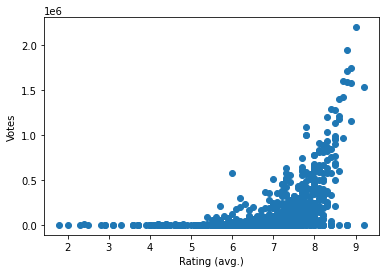

In [460]:
# Plot the data to see if a linear trend exists
plt.scatter(x, y)
plt.xlabel('Rating (avg.)')
plt.ylabel('Votes')

In [461]:
# Use sklearn's `train_test_split` to split the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [462]:
# Drop NaN
x = x[np.logical_not(np.isnan(x))]
y = y[np.logical_not(np.isnan(y))]

In [463]:
# Fit model to training data. Ccalculate scores for training and testing data
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [464]:
# Calculate mean_squared_error and r-squared value for testing data
from sklearn.metrics import mean_squared_error, r2_score

# Use model to make predictions
predicted = model.predict(x_test)

# Score predictions with Mean Squared Error and R-squared
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 53475315600.29304
R-squared (R2 ): 0.22036745284286663


In [465]:
# Call the `score` method on the model to show the r2 score
model.score(x_test, y_test)

0.22036745284286663

In [466]:
training_score = model.score(x_train, y_train)
testing_score = model.score(x_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.219272097900587
Testing Score: 0.22036745284286663


Text(0.5, 1.0, 'Residual Plot')

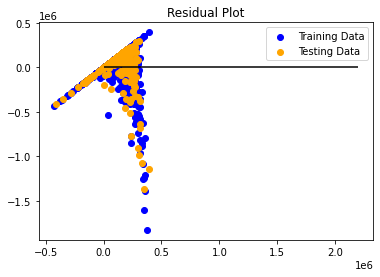

In [467]:
## LABEL
# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(x_train), model.predict(x_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(x_test), model.predict(x_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")